**Diamond price analysis**

To analyze and predict diamond prices based on their physical and categorical features.

In [127]:
#checking the current directory 
import os
os.getcwd()

'C:\\Users\\Yashasri\\Desktop\\My learning\\Diamond Price Analysis'

In [128]:
#importing the required lib
import numpy as np
import pandas as pd 
import seaborn as sns

In [129]:
data = pd.read_csv("C:\\Users\\Yashasri\\Desktop\\My learning\\Diamond Price Analysis\\diamonds.csv")
print("data loaded")

data loaded


In [130]:
data.head()

,S.no,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [131]:
data.tail()

,S.no,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.no     53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x        53940 non-null  float64
 9   y        53940 non-null  float64
 10  z        53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [133]:
data.describe

<bound method NDFrame.describe of         S.no  carat        cut color clarity  depth  table  price     x     y  \
0          1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1          2   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2          3   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
3          4   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4          5   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
...      ...    ...        ...   ...     ...    ...    ...    ...   ...   ...   
53935  53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76   
53936  53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75   
53937  53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68   
53938  53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12   
53939  53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.

In [134]:
data.shape

(53940, 11)

In [135]:
data.columns

Index(['S.no', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z'],
      dtype='object')

In [136]:
cols = ['S.no', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z']

for i in cols:
    print(data[i].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0


**No null values present in the columns**

**EDA** - Exploratory Data Analysis

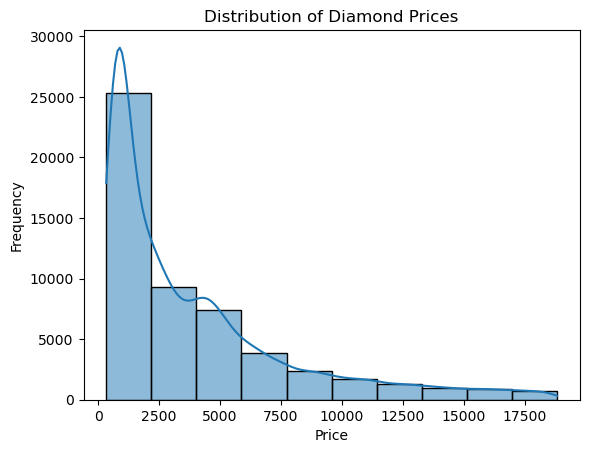

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['price'], bins=10, kde=True)
plt.title('Distribution of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

**Most diamonds are affordable, a few are very expensive**

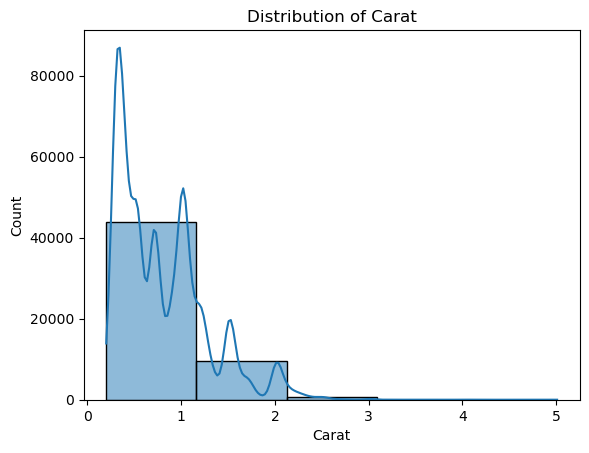

In [141]:
sns.histplot(data['carat'], bins=5, kde=True)
plt.title('Distribution of Carat')
plt.xlabel('Carat')
plt.show()

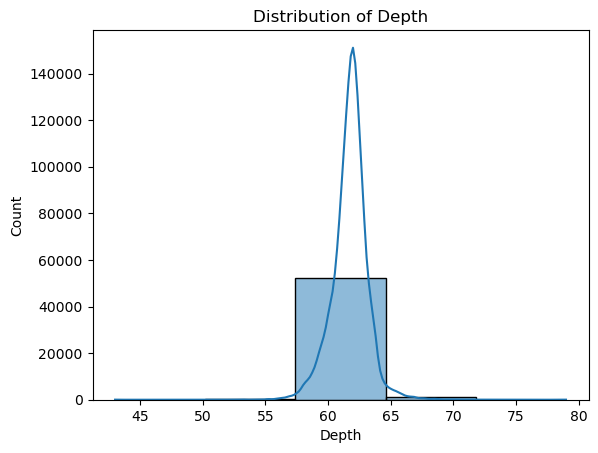

In [142]:
sns.histplot(data['depth'], bins=5, kde=True)
plt.title('Distribution of Depth')
plt.xlabel('Depth')
plt.show()

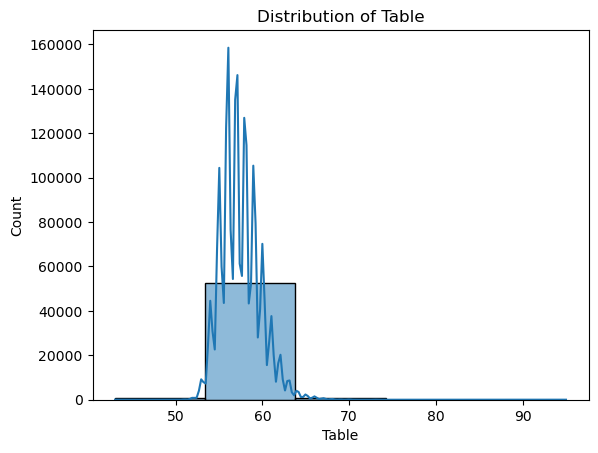

In [143]:
sns.histplot(data['table'], bins=5, kde=True)
plt.title('Distribution of Table')
plt.xlabel('Table')
plt.show()

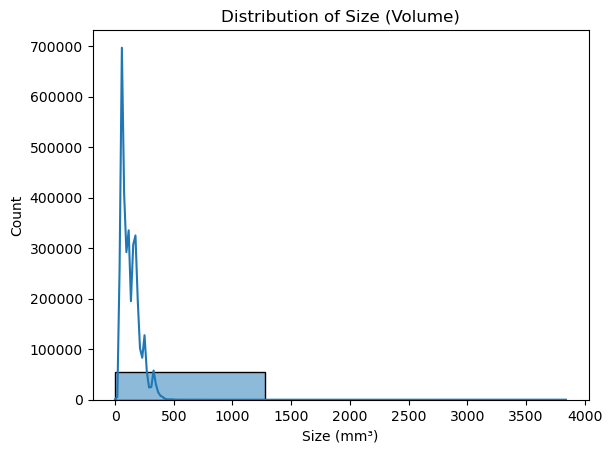

In [144]:
data['size'] = data['x'] * data['y'] * data['z']
sns.histplot(data['size'],bins = 3, kde=True)
plt.title('Distribution of Size (Volume)')
plt.xlabel('Size (mm³)')
plt.show()

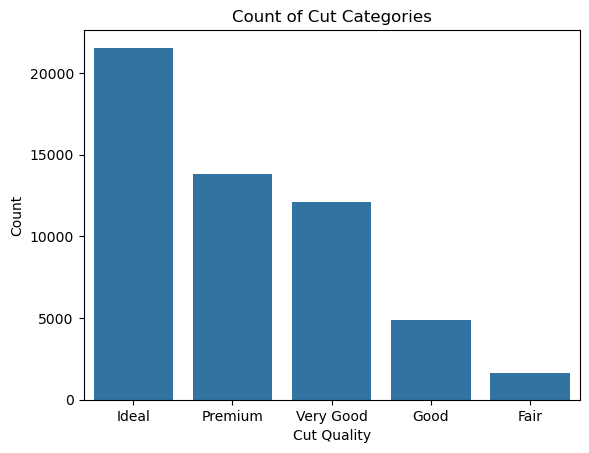

In [145]:
sns.countplot(x='cut', data=data, order=data['cut'].value_counts().index)
plt.title('Count of Cut Categories')
plt.xlabel('Cut Quality')
plt.ylabel('Count')
plt.show()

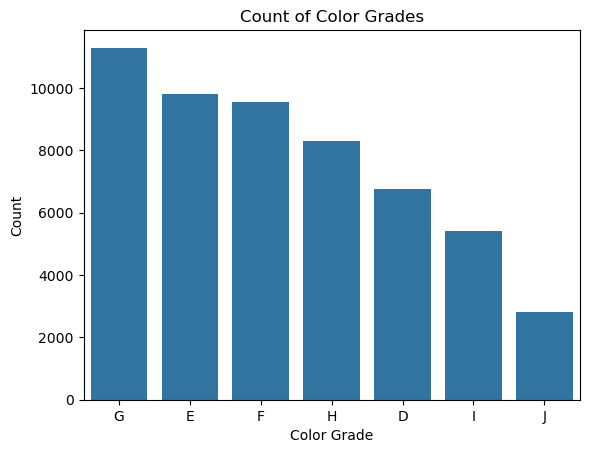

In [146]:
sns.countplot(x='color', data=data, order=data['color'].value_counts().index)
plt.title('Count of Color Grades')
plt.xlabel('Color Grade')
plt.ylabel('Count')
plt.show()

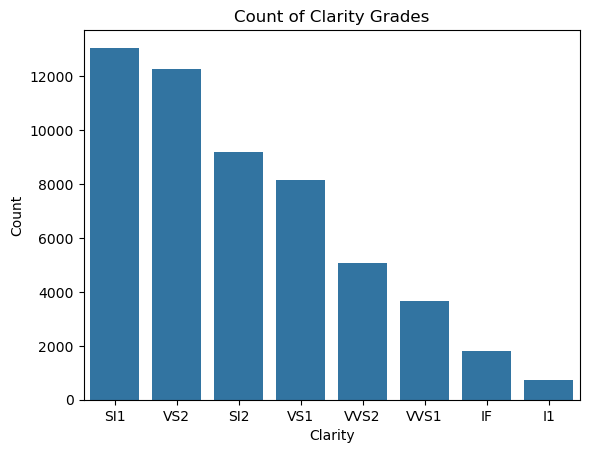

In [147]:
sns.countplot(x='clarity', data=data, order=data['clarity'].value_counts().index)
plt.title('Count of Clarity Grades')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()

**Bivariate Analysis**

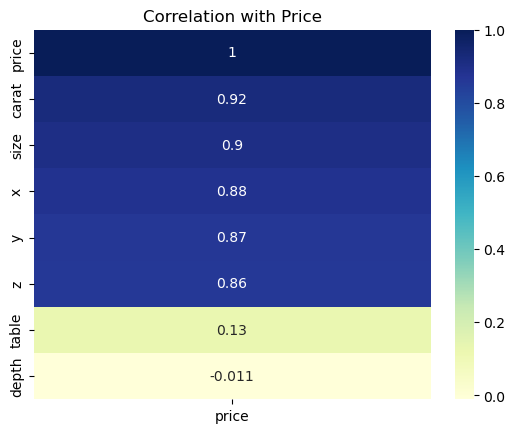

In [149]:
data_numeric = data[['carat', 'depth', 'table', 'x', 'y', 'z', 'size', 'price']]
corr = data_numeric.corr()
sns.heatmap(corr[['price']].sort_values(by='price', ascending=False), annot=True, cmap='YlGnBu')
plt.title('Correlation with Price')
plt.show()

The correlation heatmap shows that carat has the strongest positive correlation with diamond price (0.92), making it the most influential feature.

Size (volume) and the dimensions (x, y, z) also show strong correlations (0.86–0.90), indicating that larger diamonds tend to be more expensive.

In contrast, table has a weak correlation (0.13), and depth has almost no correlation (-0.011), suggesting they have minimal impact on price and may be less useful in predictive modeling.

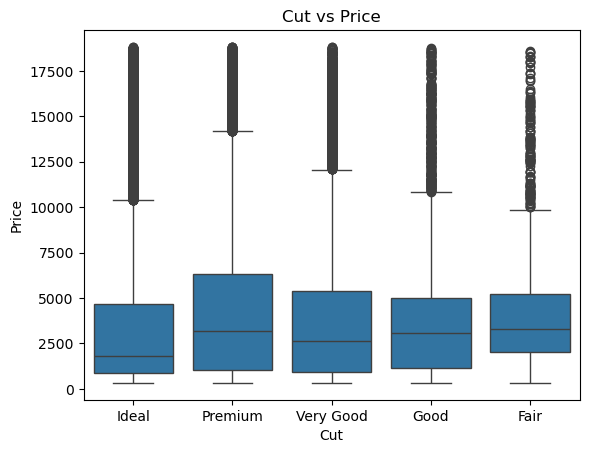

In [151]:
sns.boxplot(x='cut', y='price', data=data, order=data['cut'].value_counts().index)
plt.title('Cut vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

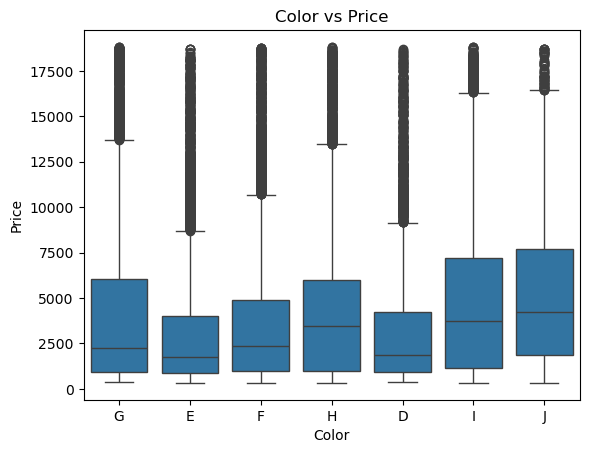

In [152]:
sns.boxplot(x='color', y='price', data=data, order=data['color'].value_counts().index)
plt.title('Color vs Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

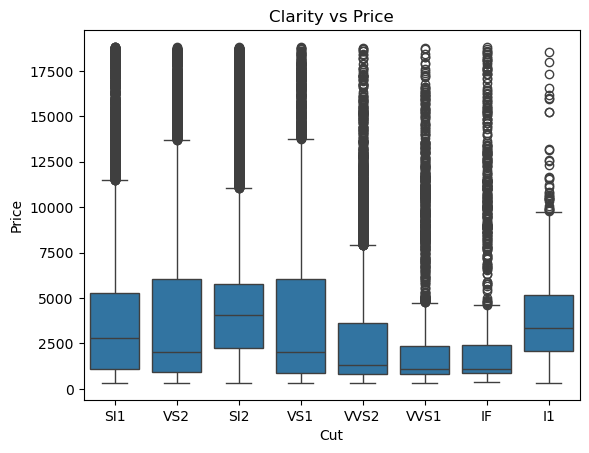

In [153]:
sns.boxplot(x='clarity', y='price', data=data, order=data['clarity'].value_counts().index)
plt.title('Clarity vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

In [154]:
data = data[(data['x'] > 0) & (data['y'] > 0) & (data['z'] > 0)].copy()

In [179]:
data_encoded = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], drop_first=False)

In [186]:
data_encoded.columns

Index(['S.no', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'size',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [188]:
# Drop S.no column
data_encoded.drop(columns=['S.no'], inplace=True)

In [192]:
from sklearn.model_selection import train_test_split

# Split features and target
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-test split done")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Train-test split done
Training set shape: (43136, 27)
Testing set shape: (10784, 27)


In [196]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

R² Score: 0.98
Mean Absolute Error: 265.60


In [202]:
import joblib
# Save the model to a file
joblib.dump(rf_model, 'diamond_price_model.pkl')

['diamond_price_model.pkl']

In [204]:
import joblib
# Save model with compression (e.g., 'zlib' compression)
joblib.dump(rf_model, 'model.pkl', compress=6)

['model.pkl']

In [206]:
!pip install gradio

     ---------------------------------------- 0.0/43.0 kB ? eta -:--:--
     ---------------------------------------- 43.0/43.0 kB 1.1 MB/s eta 0:00:00
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
   ---------------------------------------- 0.0/54.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/54.3 MB 3.3 MB/s eta 0:00:17
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.2/54.3 MB 3.0 MB/s eta 0:00:19
   ---------------------------------------- 0.3/54.3 MB 886.2 kB/s eta 0:01:01
   ---------------------------------------- 0.4/54.3 MB 892.7 kB/s eta 0:01:01
   ----

In [ ]:
import joblib
model = joblib.load("diamond_price_model.pkl")